In [4]:
from numpy import linalg
import copy
from collections import defaultdict
import json
from transformers import AutoModel
import matplotlib.pyplot as plot
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg')
%matplotlib inline

# load model 

In [ ]:
# model = AutoModel.from_pretrained("THUDM/chatglm2-6b",
#                                   trust_remote_code=True,
#                                   device_map='auto',
#                                   ).half()

# Param SVD 

In [ ]:
# %%time
# result = []
# for i in range(28):
#     current_data = defaultdict(list)

#     att_qkv = copy.deepcopy(model.transformer.encoder.layers[i].self_attention.query_key_value.weight)
#     att_qkv.data = att_qkv.data.to(torch.float32).to('cpu')
#     att_qkv = att_qkv.detach().numpy()
#     att_qkv_rank = linalg.svd(att_qkv)
#     current_data['att_qkv_rank'] = att_qkv_rank[1]

#     att_dense = copy.deepcopy(model.transformer.encoder.layers[i].self_attention.dense.weight)
#     att_dense.data = att_dense.data.to(torch.float32).to('cpu')
#     att_dense = att_dense.detach().numpy()
#     att_dense_rank = linalg.svd(att_dense)
#     current_data['att_dense_rank'] = att_dense_rank[1]

#     mlp_1 = copy.deepcopy(model.transformer.encoder.layers[i].mlp.dense_h_to_4h.weight)
#     mlp_1.data = mlp_1.data.to(torch.float32).to('cpu')
#     mlp_1 = mlp_1.detach().numpy()
#     mlp_1_rank = linalg.svd(mlp_1)
#     current_data['mlp_1_rank'] = mlp_1_rank[1]

#     mlp_2 = copy.deepcopy(model.transformer.encoder.layers[i].mlp.dense_4h_to_h.weight)
#     mlp_2.data = mlp_2.data.to(torch.float32).to('cpu')
#     mlp_2 = mlp_2.detach().numpy()
#     mlp_2_rank = linalg.svd(mlp_2)
#     current_data['mlp_2_rank'] = mlp_2_rank[1]

#     result.append(current_data)

# save SVD results to disk 

In [ ]:
# result_to_save = []
# for data in result:
#     data_current = {}
#     for name, param in data.items():
#         data_current[name] = param.tolist()
#     result_to_save.append(data_current)
# with open('rank.jsonl', 'w', encoding='utf-8') as f:
#     for data in result_to_save:
#         f.write(json.dumps(data))
#         f.write('\n')
#     f.close()

# load SVD result from disk 

In [5]:
with open('rank.jsonl', 'r', encoding='utf-8') as f:
    content = f.readlines()
    f.close()

In [11]:
for i, data in enumerate(content):
    content[i] = json.loads(content[i])

In [18]:
content[0].keys()

dict_keys(['att_qkv_rank', 'att_dense_rank', 'mlp_1_rank', 'mlp_2_rank'])

# Every layer parameters matrix rank analysis

/tmp/ipykernel_10316/4148809983.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plot.figure()#


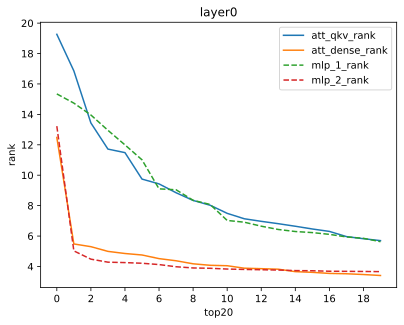

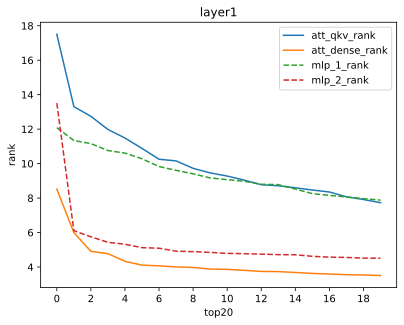

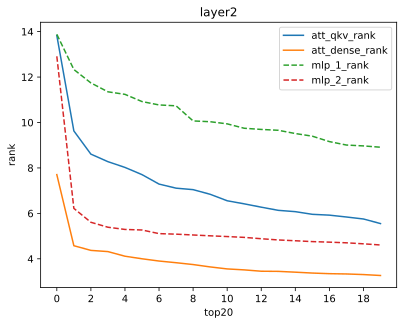

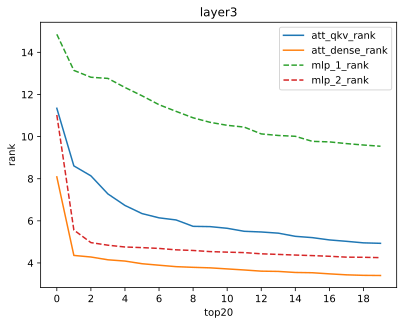

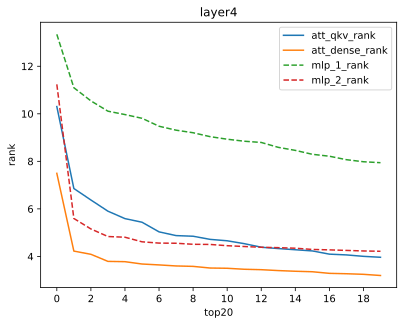

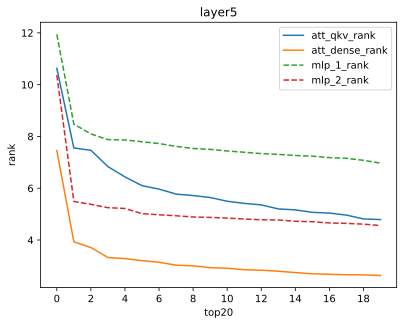

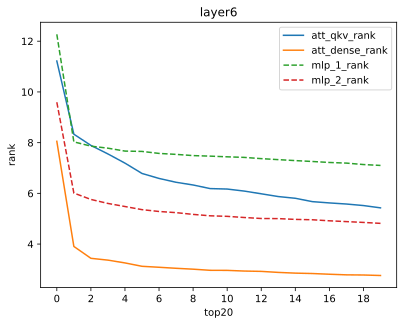

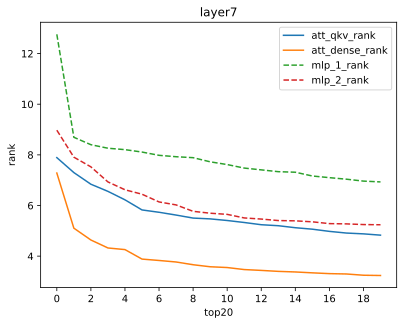

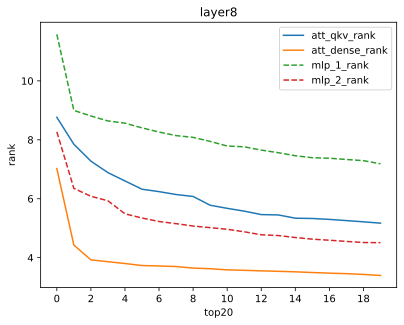

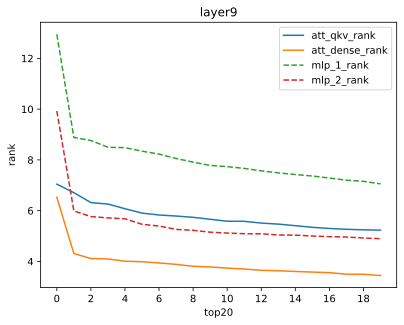

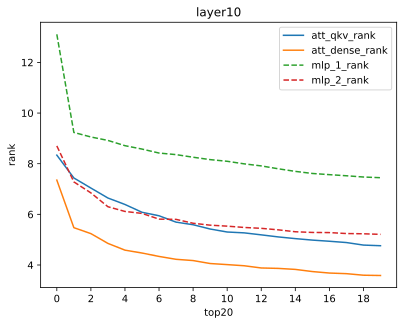

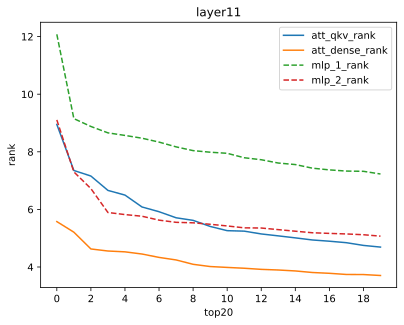

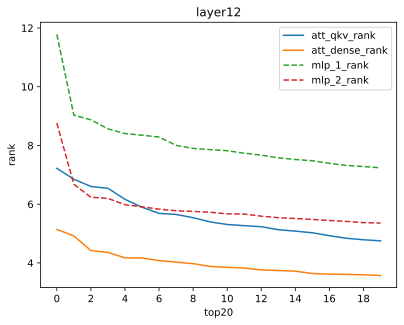

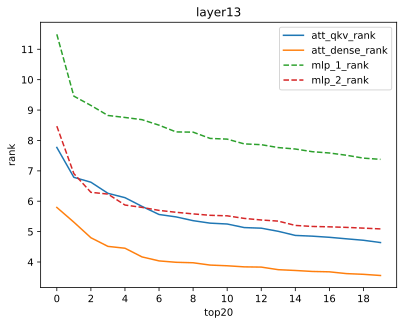

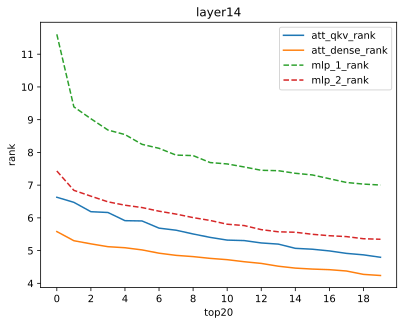

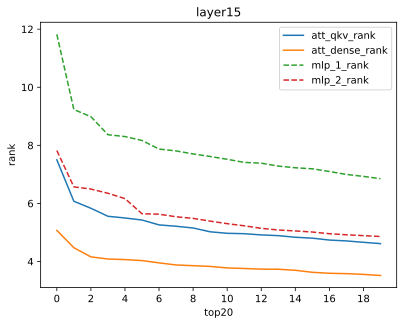

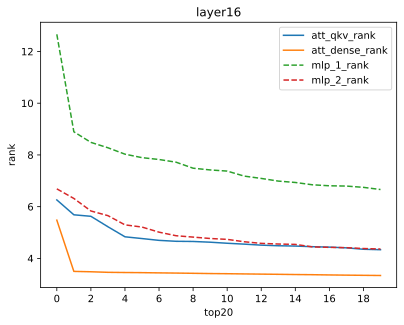

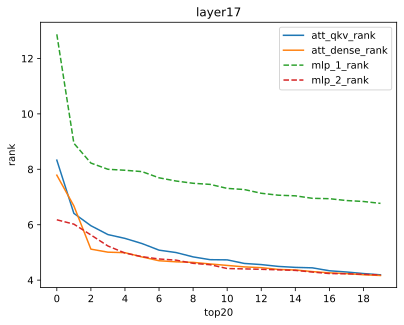

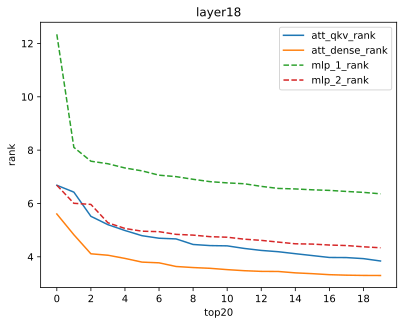

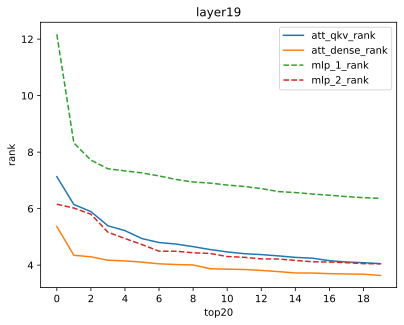

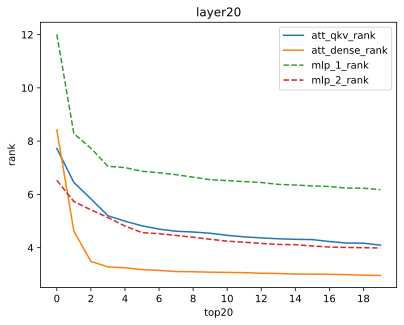

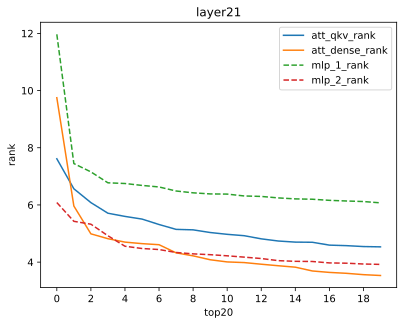

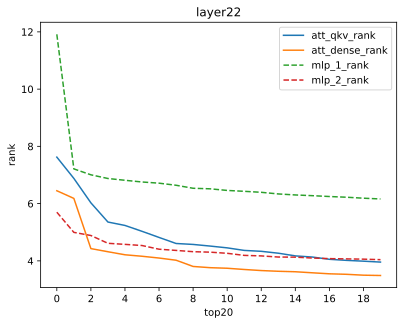

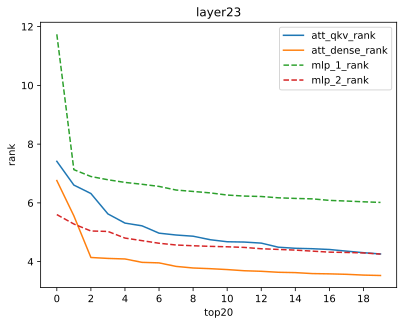

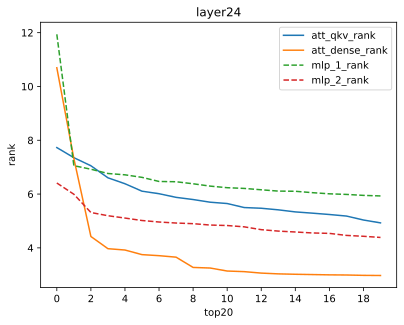

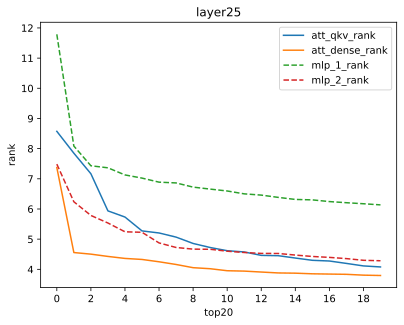

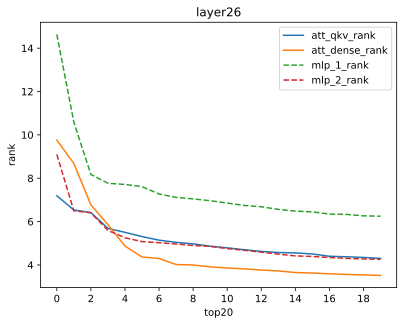

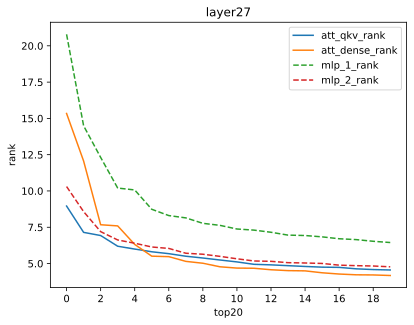

In [108]:
for i in range(len(content)):
    fig = plot.figure()# 
    plot.plot(content[i]['att_qkv_rank'][:20], label='att_qkv_rank')
    plot.plot(content[i]['att_dense_rank'][:20], label='att_dense_rank')
    plot.plot(content[i]['mlp_1_rank'][:20], label='mlp_1_rank', linestyle='--')
    plot.plot(content[i]['mlp_2_rank'][:20], label='mlp_2_rank', linestyle='--')
    plot.title(f'layer{i}')
    plot.ylabel('rank')
    plot.xlabel('top20')
    plot.xticks(range(0, 20, 2))
    plot.legend()
    fig.savefig(f'every_layer/layer_{i}.svg')

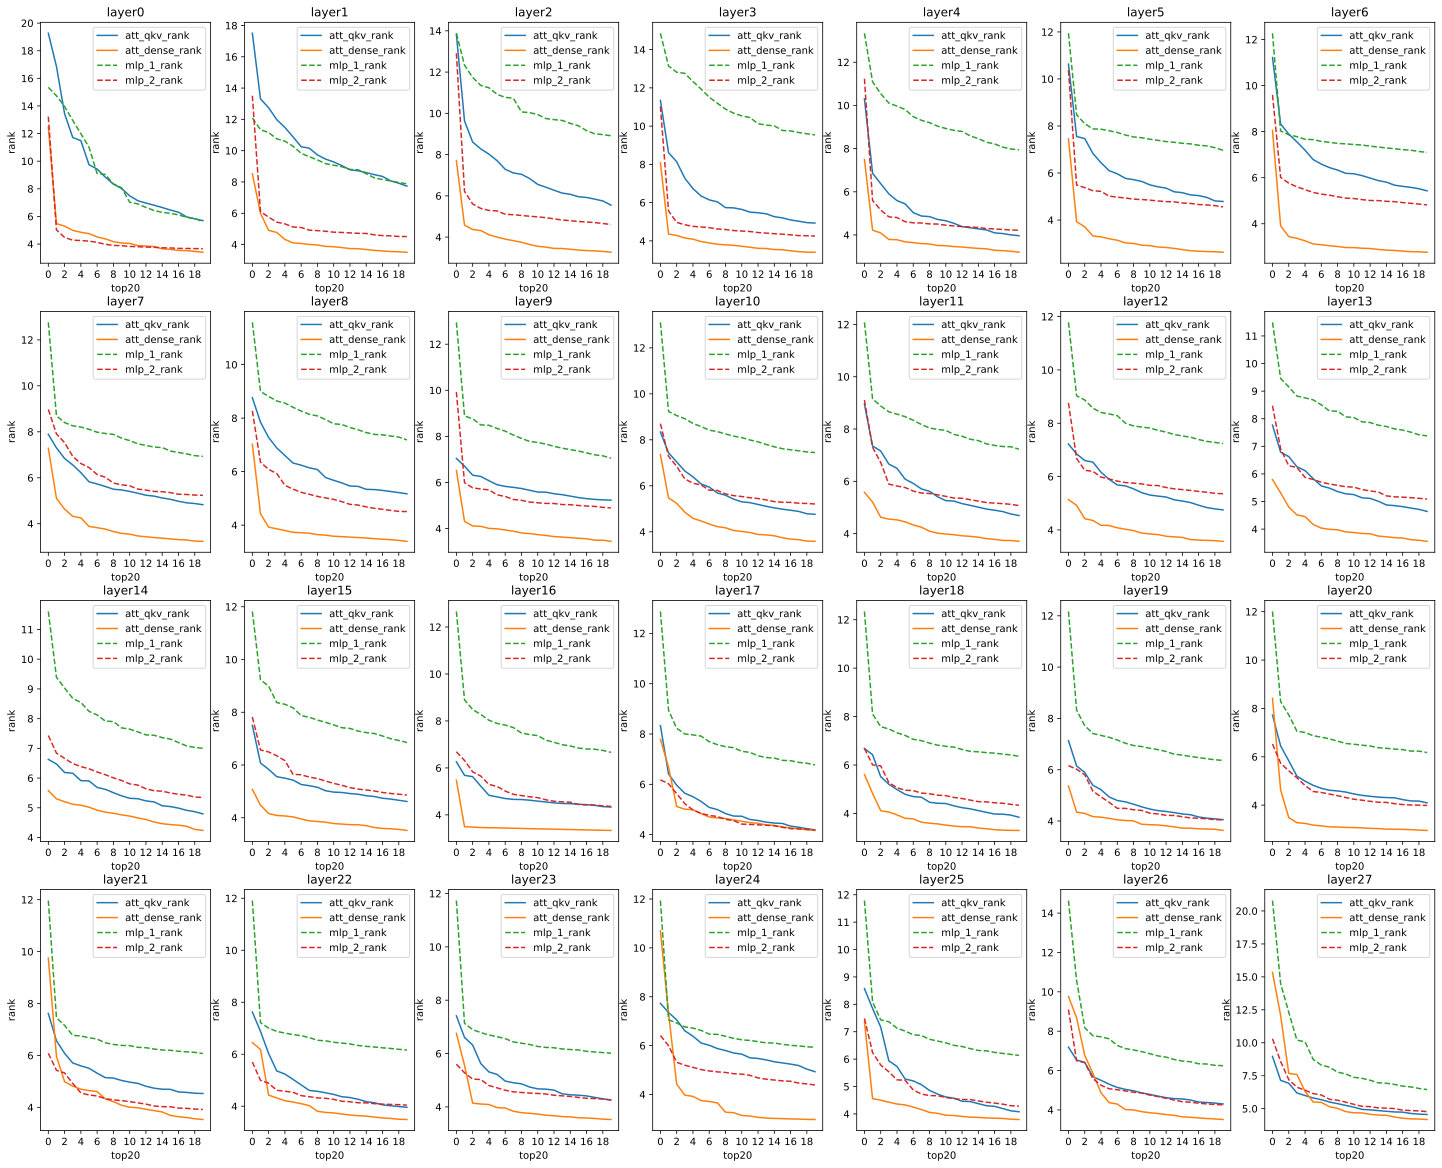

In [109]:
fig, ax = plot.subplots(ncols=7, nrows=4,figsize=(25, 20))
for i in range(4):
    for j in range(7):
        index = 7*i + j
        ax[i][j].plot(content[index]['att_qkv_rank'][:20], label='att_qkv_rank')
        ax[i][j].plot(content[index]['att_dense_rank'][:20], label='att_dense_rank')
        ax[i][j].plot(content[index]['mlp_1_rank'][:20], label='mlp_1_rank', linestyle='--')
        ax[i][j].plot(content[index]['mlp_2_rank'][:20], label='mlp_2_rank', linestyle='--')
        ax[i][j].set_title(f'layer{index}')
        ax[i][j].set_ylabel('rank')
        ax[i][j].set_xlabel('top20')
        ax[i][j].set_xticks(range(0, 20, 2))
        ax[i][j].legend()
fig.savefig(f'every_layer/all_layer_one_picture.svg')

# Variation of the rank of the parameter matrix with depth 